In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels
import os
import warnings

Filtering Out Repetitive Future Warning

In [2]:

warnings.filterwarnings("ignore", category=FutureWarning)

Exploring The Data

In [3]:

flight = pd.read_csv('airline.csv', delimiter=',')
print(flight.head())

   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  


In [4]:
print(flight.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129780 entries, 0 to 129779
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   miles                   129780 non-null  int64  
 1   passengers              129780 non-null  int64  
 2   delay                   129780 non-null  int64  
 3   inflight_meal           129780 non-null  object 
 4   inflight_entertainment  129780 non-null  object 
 5   inflight_wifi           129780 non-null  object 
 6   day_of_week             129780 non-null  object 
 7   redeye                  129780 non-null  object 
 8   weekend                 129780 non-null  object 
 9   coach_price             129780 non-null  float64
 10  firstclass_price        129780 non-null  float64
 11  hours                   129780 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 11.9+ MB
None


In [5]:
print(flight.describe())


               miles     passengers          delay    coach_price  \
count  129780.000000  129780.000000  129780.000000  129780.000000   
mean     2006.224696     207.723155      13.162845     376.585253   
std       943.034768      12.776363      41.941680      67.744274   
min        12.000000     135.000000       0.000000      44.415000   
25%      1343.000000     204.000000       9.000000     331.445000   
50%      1986.000000     210.000000      10.000000     380.560000   
75%      2468.000000     215.000000      13.000000     426.676250   
max      4548.000000     244.000000    1560.000000     593.635000   

       firstclass_price          hours  
count     129780.000000  129780.000000  
mean        1454.931785       3.631214  
std          162.590434       1.739118  
min          939.100000       1.000000  
25%         1302.200000       2.000000  
50%         1503.840000       4.000000  
75%         1582.370000       4.000000  
max         1846.780000       8.000000  


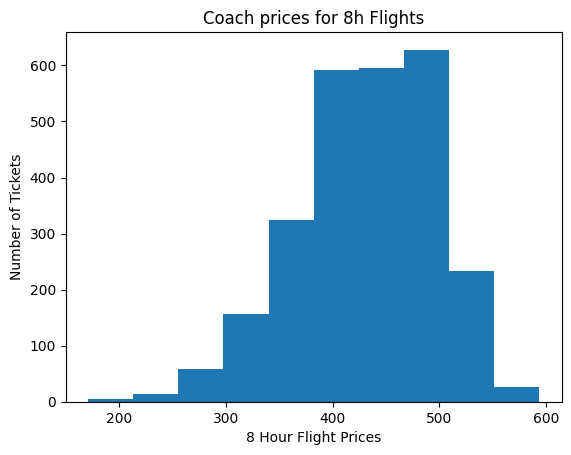

In [6]:
long_flights = flight.coach_price[flight.hours >= 8]
plt.hist(long_flights)
plt.title('Coach prices for 8h Flights')
plt.xlabel('8 Hour Flight Prices')
plt.ylabel('Number of Tickets')
plt.show()

Exploring Flight Delays

In [7]:

print(flight.delay[flight.delay > 0].mean())
print('maximum delay is ' + str(flight.delay.max()), '\nminimum delay is '+ str(flight.delay.min()), '\nmost often the flight is delayed for ' + str(flight.delay.mode()))


14.278332678596803
maximum delay is 1560 
minimum delay is 0 
most often the flight is delayed for 0    10
Name: delay, dtype: int64


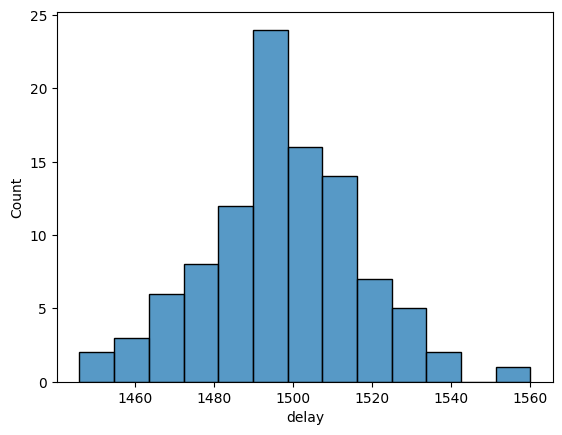

In [8]:
sns.histplot(flight.delay[flight.delay > 100 ])
plt.show()

First Class & Coach Prices Correlation

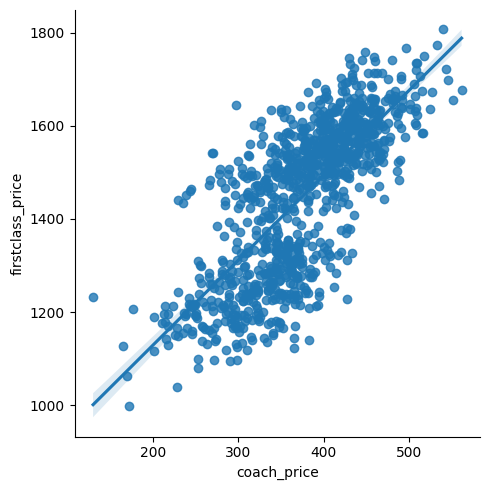

In [9]:
random_subset = flight.sample(1000, random_state=42)
sns.lmplot(x='coach_price', y='firstclass_price', data=random_subset )
plt.show()

Correlation Between Coach Prices & Perks

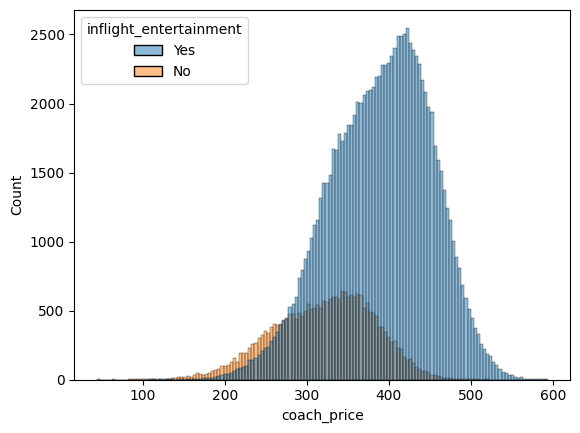

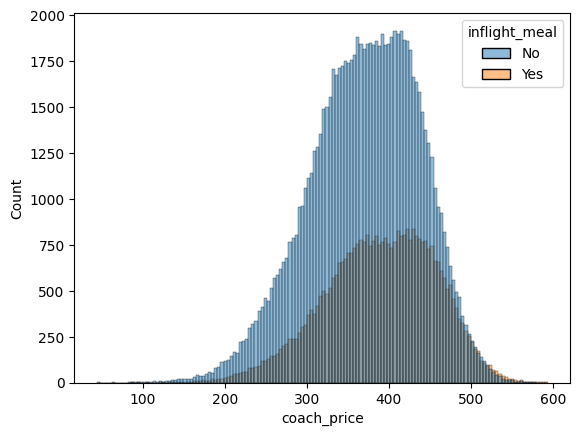

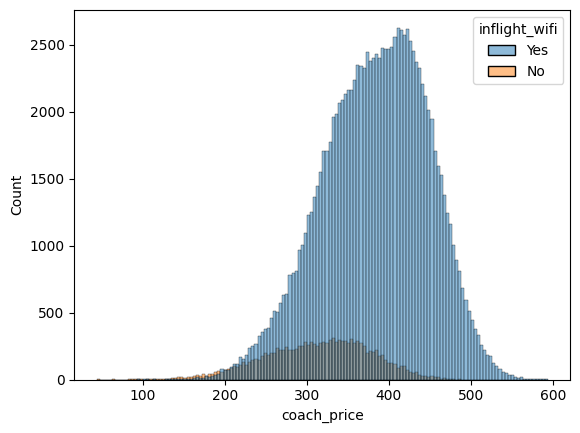

In [10]:
sns.histplot(data=flight, x='coach_price', hue='inflight_entertainment')
plt.show()
sns.histplot(data=flight, x='coach_price', hue='inflight_meal')
plt.show()
sns.histplot(data=flight, x='coach_price', hue='inflight_wifi')
plt.show()

Length of Flights & Number of Passengers Relationship


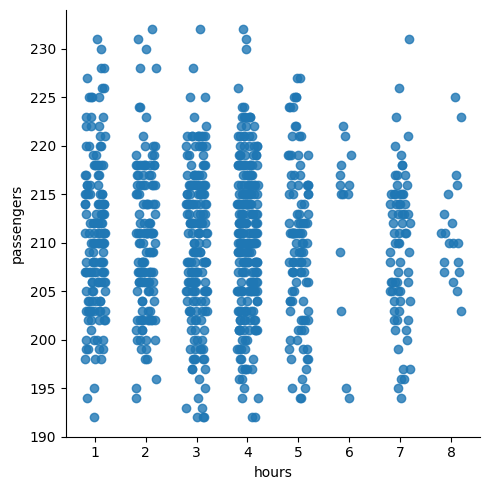

In [11]:
random_subset190 = random_subset[random_subset.passengers > 190]
sns.lmplot(data=random_subset190, x='hours', y='passengers', x_jitter=0.2,  fit_reg=False)
plt.show()

Prices on Weekends

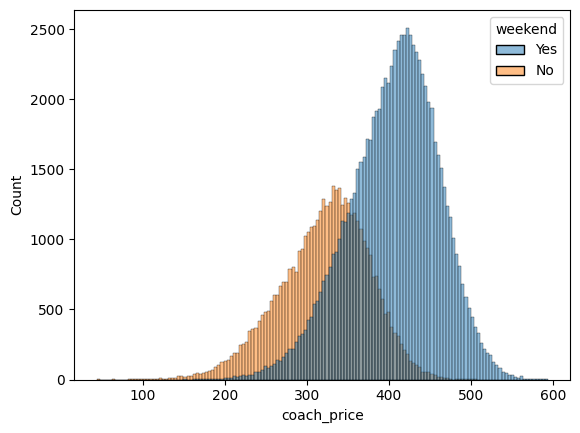

In [12]:

sns.histplot(data=flight, x='coach_price', hue='weekend' )
plt.show()

Coach Prices by Redeye


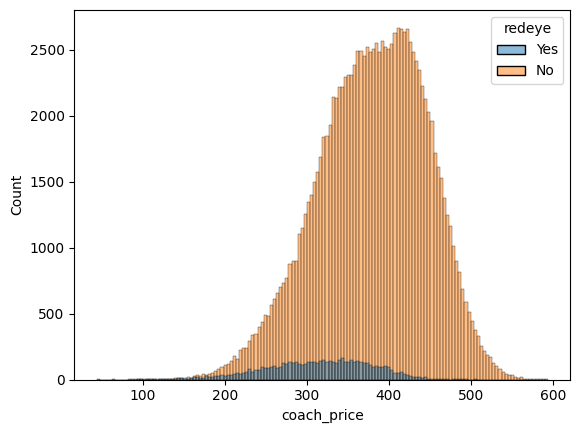

In [13]:

sns.histplot(data=flight, x='coach_price', hue='redeye' )
plt.show()